In [7]:
import act
import glob
import matplotlib.pyplot as plt
import json
import xarray as xr
import numpy as np

In [14]:
#Read in ARM Live Data Webservice Token and Username
with open('./token.json') as f:
    data = json.load(f)
username = data['username']
token = data['token']

In [15]:
datastream = 'sgpmplpolfsC1.b1'
startdate = '2019-06-01'
enddate = '2019-06-02'
#Download SGP MPLPOLFS Data
files = glob.glob(''.join(['./',datastream,'/*nc']))
if len(files) == 0:
    act.discovery.download_data(username, token, datastream, startdate, enddate)
    files = glob.glob(''.join(['./',datastream,'/*nc']))

[DOWNLOADING] sgpmplpolfsC1.b1.20190601.000002.nc
[DOWNLOADING] sgpmplpolfsC1.b1.20190602.000001.nc


In [16]:
#Get MPL files and read into Object
files = glob.glob(''.join(['./',datastream,'/*nc']))
mpl_obj = act.io.armfiles.read_netcdf(files)

In [17]:
mpl_obj = mpl_obj.rename({'range':'mpl_range'})
mpl_obj = act.corrections.mpl.correct_mpl(mpl_obj)

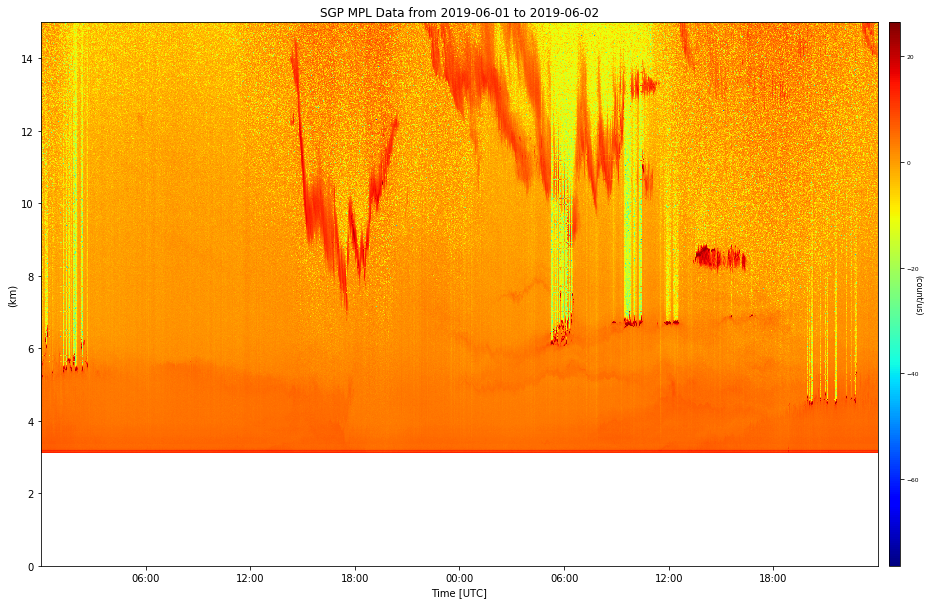

In [19]:
#Plot  Data
display = act.plotting.TimeSeriesDisplay(mpl_obj,figsize=(15,10),subplot_shape=(1,))
title = 'SGP MPL Data from '+startdate+' to '+enddate
display.plot('signal_return_co_pol',set_title=title,subplot_index=(0,),cbmin=-20, cbmax=20, cmap='jet')
display.set_yrng([0,15])

plt.show()